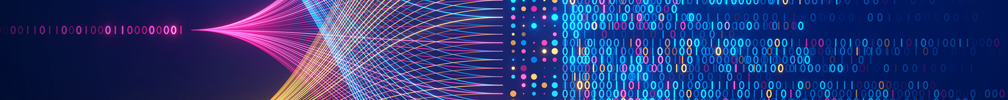

# Week 7 Overview
Medicine is increasingly using machine learning to provide data-driven diagnoses. For example, predicting the risk of breast cancer based on a single screening test might miss subtle patterns, leading to missed diagnoses. By combining multiple tests, such as mammograms, ultrasounds, and genetic data, doctors can achieve a more comprehensive assessment of a patient’s risk. This is the essence of **ensemble methods** in machine learning—integrating multiple models to enhance accuracy and reliability, ultimately providing more robust predictions.

Last week, we explored decision trees, learning how they can make step-by-step decisions to understand complex data. However, even the best decision tree can sometimes miss complex relationships in your data. This week, we’ll explore **ensemble methods** like **Bagging, Boosting, and Random Forests**, which allow us to harness the power of many models working together. These techniques help improve accuracy and reduce overfitting, giving us more robust, well-rounded insights. We’ll see how each method strikes a balance between performance and complexity and why they have become go-to solutions for handling challenging prediction tasks across various fields.

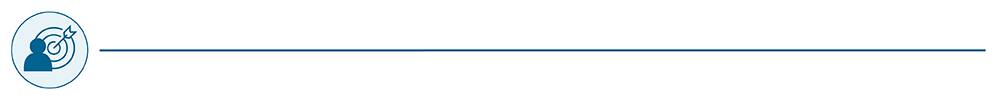

## Learning Objectives
By the end of this week, you will be able to:
- Explain how ensemble methods improve accuracy and reduce overfitting compared to individual models
- Differentiate between Bagging, Boosting, and Random Forests 
- Illustrate how decision boundaries evolve in ensemble methods as models are added
- Explain why ensemble methods are less interpretable than simpler models 
- Evaluate the efficiency of the various methods


## 7.1 Lesson: Ensemble Methods: Bagging
Ensemble methods outperform single models by combining the strengths of multiple models to produce more accurate and reliable predictions. Instead of relying on a single model, which might overfit to noise or miss key patterns, ensemble techniques aggregate the outputs of several models, effectively averaging out errors and reducing the risk of overfitting. For example, in predicting house prices, a single decision tree might give unreliable estimates because it overfits to specific data points in the training set. However, with Bagging (Bootstrap Aggregating), multiple decision trees are trained on different random subsets of the data, each capturing slightly different patterns. By averaging the predictions from all these trees, Bagging cancels out the noise and provides a more stable, accurate prediction. This diversity among models helps handle complex or noisy data, leading to improved performance over using a single decision tree alone.

### Bagging (Bootstrap Aggregating)
In Week 3, we briefly mentioned **Bootstrap Sampling**, a statistical method where multiple samples are created by randomly selecting data points with replacement from a dataset. Each bootstrap sample can include duplicate entries and some original data points may be left out. We’ll use this technique to improve the accuracy of the decision tree method.

#### How Bagging Works
The key concept in bagging is to create multiple versions of the training dataset and average the results.
1. **Bootstrap Sampling:** Take $\beta$ bootstrap samples from the original training data. Typically, for a dataset of size *n*, about $\frac{2n}{3}$ samples are taken with replacement, resulting in some duplication, so that, on average, about 62.3% of the unique data points end up in the sample.
2. **Training Individual Models:** Train a separate decision tree (or another model) on each of these $\beta$ samples. Each of these trees might capture slightly different aspects of the data due ot the differences and samples.
3. **Averaging Predictions:**
    - For **regression**, the predictions from all the trees are averaged to produce the final prediction.
    - For **classification**, a voting mechanism is often used where the class predicted by the majority of trees is selected as the final outcome. We'll return ot this diea in week 12.

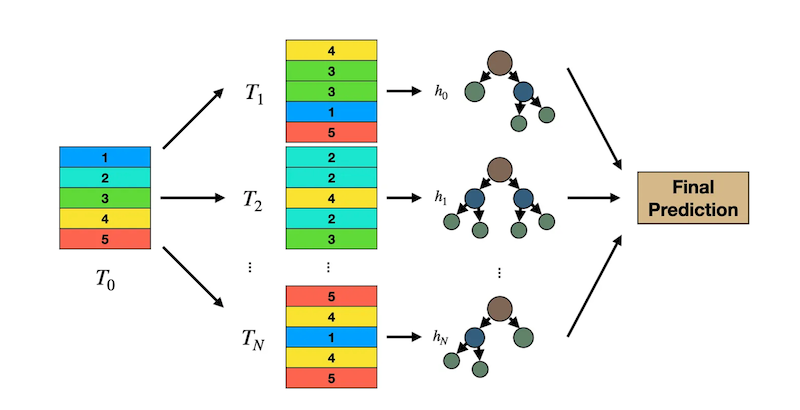

### Why Bagging Works: The Power of the Central Limit Theorem
Note: Now might be a good time to revisit the Central Limit Theorem from Module 1!

Bagging enhances model performance by averaging predictions across multiple decision trees, reducing the effect of random fluctuations or "noise." This is a great example of the power of the CLT:

If we express each prediction as $\hat{y} = \mu_i + \epsilon_i$, where $\mu_i$ represents the true signal (the average in the leaves of the decision trees) and $\epsilon_i$ represents noise, the signal ($\mu_i$) remains consistent, while the noise ($\epsilon_i$) varies randomly.

According to the CLT, when we average multiple $\hat{y}$ values, the variations (noise) tend to cancel out, especially if they are independent and normally distributed with a mean of 0. The true signal persists, but the noise diminishes as more predictions are averaged, leading to a more stable and accurate outcome.

In Bagging, we create multiple decision trees by generating different bootstrap smples of the data. Each tree may slightly overfit, capturing noise, but ther consistent patterns (the signal) across trees remain. When we average the predictions, the noisy errors, which are akin to independent random variables, average out, leaving a more reliable estimate. This is a direct application of the CLT, where averaging multiple models leads to reduced variance and a more accurate prediction.

#### Benefits of Bagging
- **Reduces Variance and Overfitting:** Bagging averages predictions from multiple models, which reduces the model's variance and minimizes the risk of overfitting, leading to better generalization on new data.
- **Balances Model Predictions:** While individual decision trees might overfit to specific patterns in the training data, Bagging combines many of these overfitted models, smoothing out their predictions for a more balanced outcome.
- **Improves Stability:** Bagging creates more stable models that are less sensitive to outliers and noise, providing consistent results across different datasets.

#### Out-of-Bag (OOB) Error Estimation
An interesting by-product of Bagging is that it can provide a way to estimate the performance of the model without needing a separate validation set. Since each bootstrap sample only includes about two-thirds of the original data points, the remaining one-third (called out-of-bag, or OOB data) can be used to test the model. The error on this OOB data provides a reliable estimate of how the model will perform on unseen data.

#### How Many Samples?
Naturally, we need a practical strategy for the hyperparameter $\beta$. The performance of Bagging improves as the number of trees $\beta$ increaes, but the computational cost also grows, so you will need to trade off accuracy against the resources you can harness.

There isn't a strict formula for choosing the best $\beta$, but here are some common approachesL
1. **Cross-Validation:** Start with a smaller $\beta$ (e.g., 50) and gradually increase it. Monitor the model's performance using K-Fold CV. Stop when further increases in $\beta$ provide minimal improvement.
2. **Out-of-Bag (OOB) Error:** Track the OOB error as you increase $\beta$. When the error stabilizes, you've likely found a suitable value. This method is efficient as it avoids using a separate validation set.
3. **Practical Guidelines:** Start with $\beta$ in the range 50-100. Increase if the dataset is large or complex. (For Random Forests, which we cover below, a common starting  poing s $\beta = 100$.)

### The Bias-Variance Tradeoff in Bagging
Bagging reduces variance but does not change the bias over the underlying models. It is particularly effective for high-variance, low-bias models like decision tree.s

**Bagging reduces variance by averaging multiple model's predictions**. High variance models, like decision trees, can be sensitive to small changes in the training data, leading to overfitting. Bagging trains several models on different bootstrap samples and averages their inputs. As explained above, this reduces the variance of the final prediction.

**Bagging does not change bias because it does not alter the underlying model**. Each model in a Bagging ensemble is trained independently on different bootstrap samples but follows the same rules and assumptions. If the original model has high bias(e.g., it over simplifies patterns), each model in the ensemble will still carry the same bias. Averaging the predictions has no effect on this. (Compare thsi with statistical sampling theory, which states that the sample mean is an unbiased estimator of the population mean.)

#### Example: Predicting Housing Prices with Bagging
Suppose we use Bagging to predict housing prices by training $\beta = 500$ decision trees on different bootstrap samples of the dataset. Each tree might overfit to specific patterns or anomalies in its sample, such as rare features in certain houses. By averaging the predictions from all 500 trees, Bagging smooths out these inconsistencies, reducing the impact of outliers and producing a more stable, accurate estimate. This is how Bagging reduces variance—the random errors in individual models tend to cancel out when combined.

However, if each decision tree has a consistent bias, such as consistently underestimating high-end house prices, Bagging won’t change that bias. Even with 500 trees, the ensemble will still carry the same bias; it will just make the predictions more stable by averaging out the noise. Bagging improves reliability and generalization by reducing variance, but it doesn’t correct systematic errors (bias) present in the underlying models.

Let’s try an example to see how Bagging compares to Decision Trees!

### Bagging:
The notebook from this video below can be found in this GitHub repository. Access the notebook and follow along with the video. Pause the video if you need to while you complete the workbook.

### Think About It
- Why might Bagging be particularly effective for high-variance models like decision trees? What does it mean to "average out the noise"? Does this depend on your assumption about the probability distribution of the noise?
- Bagging reduces variance but does not change bias. What are some scenarios where this might be a limitation, and how could you address it?
- How does the Central Limit Theorem explain the effectiveness of Bagging in reducing the impact of random errors?
- If you observe that your Bagging model's performance improves as you increase the number of trees $\beta$, what might be happening? Are there practical limits to how far you should increase $\beta$?
- Suppose each decision tree in your Bagging model consistently underestimates the value of expensive houses. Will adding more trees improve this bias? Why or why not?




### Week 7 Video Notebook: Ensemble Methods -- Bagging

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV,LeaveOneOut 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from tqdm import tqdm

# globals

random_state = 42

# utility code

def format_time(seconds):
    
    # Convert seconds to hours, minutes, and remaining seconds
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    remaining_seconds = seconds % 60
    
    # Return a formatted string    
    if hours == 0 and minutes == 0:
        return f"{seconds:.2f}s"
    elif hours == 0:
        return f"{minutes}m {remaining_seconds:.2f}s"

    return f"{hours}h {minutes}m {remaining_seconds:.2f}s"

# To avoid constant warnings about jobs: 
#        UserWarning: A worker stopped while some jobs were given to the executor. 
#        This can be caused by a too short worker timeout or by a memory leak.

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Load and Split the CA Housing Dataset

In [3]:
# Load the California Housing Dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
# Split dataset 

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


len(X_train),len(X_test)

(16512, 4128)

### Exploration and Tuning of HyperParameters by Hand

#### Basic Bagging Regressor:
We provide a wrapper function to simplify experimentation with parameters. We will use cross-validation to find the validation score for each choise of parameters.

Note: See the **appendix** below for a detailed description of the parameters and suggestions for how to use them.

In [5]:
# Wrapper around BaggingRegressor with cross-validation

# Note on n_jobs:  There are two parallel threads here, for the model and the CV. Depending on
# your machine, so you may have to run everything with n_jobs = 1, or run one with -1 and one
# with 1. This configuration runs well on my Macbook Pro with M4 chip, but YMMV.

# If it still runs too slow, you could try changing the default for cv to 3. 

# record beginning time
start = time.time()

### Bagging Regressor ###
def run_bagging_regressor(X_train,
                             y_train,
                             estimator    = DecisionTreeRegressor(), # defaults
                             n_estimators = 10,
                             max_samples  = 1.0, 
                             max_features = 1.0,
                             random_state = random_state,
                             cv=5,         # Number of folds for cross-validation
                             n_jobs = -1   
                            ):                
    
    bagging_model = BaggingRegressor(
        estimator    = estimator,
        n_estimators = n_estimators, 
        max_samples  = max_samples,
        max_features = max_features,
        n_jobs       = n_jobs,       
        random_state = random_state
    )

    # Perform cross-validation and return mean CV MSE
    neg_mse_scores = cross_val_score(bagging_model, X_train, y_train, 
                                     scoring='neg_mean_squared_error', 
                                     cv=cv, 
                                     n_jobs=n_jobs
                                    )
    mean_cv_mse = -np.mean(neg_mse_scores)             # Convert negative MSE back to positive
    
    return mean_cv_mse

# Baseline using defaults
baseline_mse = run_bagging_regressor(X_train, y_train,n_jobs=-1)   
                                                                    
print(f'Baseline MSE: {baseline_mse:.4f}')

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))

Baseline MSE: 0.2882
Execution Time: 1.73s


#### Exploring Parameter Choices
Single experiments are often useful...

In [6]:
run_bagging_regressor(X_train, y_train, estimator=LinearRegression())

0.5212934091811682

In [7]:
run_bagging_regressor(X_train, y_train, estimator=SVR())

1.3780857982829091

In [8]:
run_bagging_regressor(X_train,y_train,n_estimators=10,max_samples=1.0,max_features=8)

0.28820104649501416

### Your Turn!
Pause the video and cut and paste the function call from the last cell, and try various values of the parameters.

But visualizing the relationships is better!
#### Plotting Parameter Choices against MSE

100%|██████████| 96/96 [19:46<00:00, 12.36s/it]


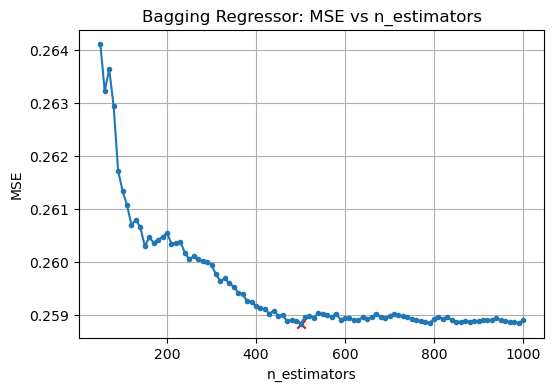

Minimum MSE 0.2588 found at x = 500
Execution Time: 19m 46.49s


In [9]:
# Plot a n_estimators vs MSE using a simple for loop

# record beginning time
start = time.time()

parameter_list = range(50,1001,10)       

param = 'n_estimators'                  # <= and here

MSEs = []

for n in tqdm(parameter_list):

    MSEs.append( run_bagging_regressor(X_train,y_train,
                                       n_estimators = n,                  #  <= and here
                                       max_samples  = 1.0,
                                       max_features = 1.0   
                                      ) ) 

# Find the minimum value
min_MSE = min(MSEs)

# Find the index of the minimum value
min_index = MSEs.index(min_MSE)

plt.figure(figsize=(6, 4))
plt.title("Bagging Regressor: MSE vs "+param)
plt.plot(parameter_list, MSEs, marker='.')
plt.scatter([parameter_list[min_index]],[min_MSE],marker='x',color='red')
plt.xlabel(param)
plt.ylabel("MSE")
plt.grid()
plt.show()

if isinstance(parameter_list[min_index], int):
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]}")
else:
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))

100%|██████████| 8/8 [01:32<00:00, 11.56s/it]


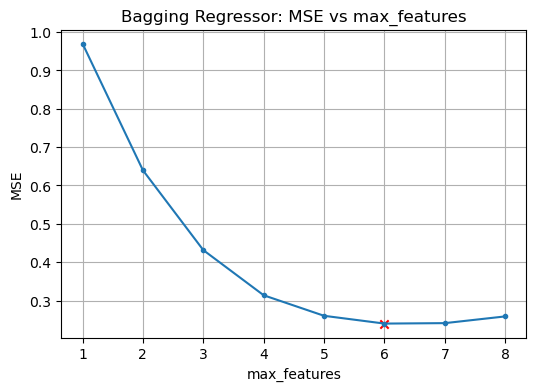

Minimum MSE 0.2401 found at x = 6
Execution Time: 1m 32.61s


In [10]:
# Plot a max_features vs MSE using optimal value for n_estimators=790 

# Note: there are 8 features, so more useful to use integers

start = time.time()

parameter_list = range(1,9)                   # <= Make changes here:   

param = 'max_features'                        # <= and here

MSEs = []

for n in tqdm(parameter_list):

    MSEs.append( run_bagging_regressor(X_train,y_train,
                                       n_estimators = 790,                  # <= and here
                                       max_samples  = 1.0,
                                       max_features = n
                                      ) ) 

# Find the minimum value
min_MSE = min(MSEs)

# Find the index of the minimum value
min_index = MSEs.index(min_MSE)

plt.figure(figsize=(6, 4))
plt.title("Bagging Regressor: MSE vs "+param)
plt.plot(parameter_list, MSEs, marker='.')
plt.scatter([parameter_list[min_index]],[min_MSE],marker='x',color='red')
plt.xlabel(param)
plt.ylabel("MSE")
plt.grid()
plt.show()

if isinstance(parameter_list[min_index], int):
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]}")
else:
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))

100%|██████████| 11/11 [02:08<00:00, 11.66s/it]


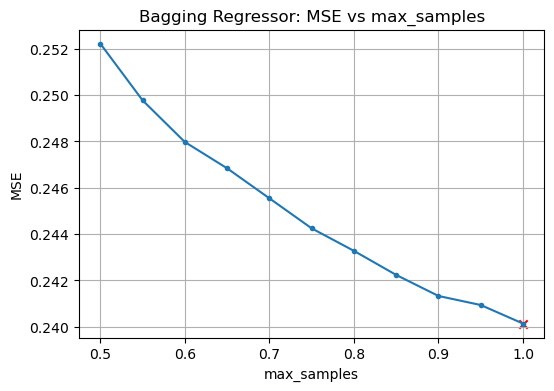

Minimum MSE 0.2401 found at x = 1.0000
Execution Time: 2m 8.34s


In [11]:
# Plot a max_samples vs MSE using a simple for loop using n_estimators = 790 and max_features = 6

# Note: Since there are 16,512 training samples, use float to specify percentage of total

start = time.time()

# parameter_list = np.linspace(0.1,1.0,10)       # <= Make changes here: 
parameter_list = np.linspace(0.5,1.0,11)

param = 'max_samples'                          # <= and here

MSEs = []

for n in tqdm(parameter_list):

    MSEs.append( run_bagging_regressor(X_train,y_train,
                                       n_estimators = 790,
                                       max_samples  = n,
                                       max_features = 6
                                      ) ) 

# Find the minimum value
min_MSE = min(MSEs)

# Find the index of the minimum value
min_index = MSEs.index(min_MSE)

plt.figure(figsize=(6, 4))
plt.title("Bagging Regressor: MSE vs "+param)
plt.plot(parameter_list, MSEs, marker='.')
plt.scatter([parameter_list[min_index]],[min_MSE],marker='x',color='red')
plt.xlabel(param)
plt.ylabel("MSE")
plt.grid()
plt.show()

if isinstance(parameter_list[min_index], int):
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]}")
else:
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))

In [12]:
run_bagging_regressor(X_train,y_train,n_estimators=790,max_samples=1.0,max_features=6)

0.2401406554776587

If all the parameters were independent, then we would be done! But of course it's not that simple....

### Second Round: Redo the experiments with optimal values to refine

100%|██████████| 101/101 [04:42<00:00,  2.79s/it]


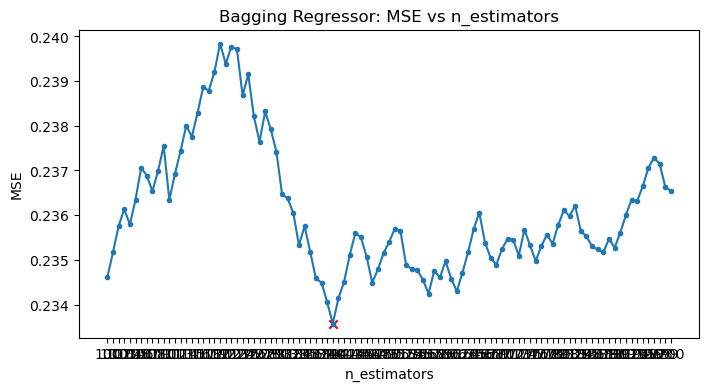

Minimum MSE 0.2336 found at x = 140
Execution Time: 4m 42.36s


In [13]:
# Plot n_estimators vs MSE with max_samples = 1.0 and max_features = 6

start = time.time()

# parameter_list = range(50,1001,10)        # I ran this and got 140, see plot below
parameter_list = range(100,201)             # So ran it with maximum precision (these are integers)

param = 'n_estimators'                

MSEs = []

for n in tqdm(parameter_list):

    MSEs.append( run_bagging_regressor(X_train,y_train,
                                       n_estimators = n,
                                       max_samples  = 1.0,
                                       max_features = 6                                  
                                      ) ) 

# Find the minimum value
min_MSE = min(MSEs)

# Find the index of the minimum value
min_index = MSEs.index(min_MSE)

plt.figure(figsize=(8, 4))
plt.title("Bagging Regressor: MSE vs "+param)
plt.plot(parameter_list, MSEs, marker='.')
plt.scatter([parameter_list[min_index]],[min_MSE],marker='x',color='red')
plt.xlabel(param)
plt.ylabel("MSE")
plt.xticks(parameter_list)
plt.show()

if isinstance(parameter_list[min_index], int):
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]}")
else:
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))

Your Turn!
Rerun the tests for max_samples and max_features by cutting and pasting from the cells above and making the appropriate changes.

Hint: You'll very likely get a value very close but not equal to 1.0 for max_samples. Given the randomness involved in splitting the data, choosing 6 out of 8 features, and doing CV, it is not necessary to worry about very small differences in this parameter, which refers to a percentage of 16,512 samples.

Realizing when you have reached the "point of diminishing returns" is one of the skills you need to learn in training machine learning models.

In [14]:
run_bagging_regressor(X_train,y_train,n_estimators=140,max_samples=1.0,max_features=6)

0.2335778568728894

In [15]:
run_bagging_regressor(X_train,y_train,n_estimators=140,max_samples=0.998,max_features=6)

0.2334638939949361

### How Accurately can we Tune Parameters?
As usual, the answer is "It depends"!

The most important thing to realize is that if we want our model to **GENERALIZE** to **new data** then we can not depend on a particular split of the data.

Here is a histogram of the MSEs that result from these "optimal" parameters if we run it with 100 different random states, representing 100 different random splits of the data. I did not change the random state of the model or the CV, so any variation you see is due completely to what split of training and testing data occurs.

The variance of your predictions from the trained model is of course an important consideration, so we shall continue to think about this in the other ensemble models.

Note: One way to reduce the variance is to use `cv=LeaveOneOut()` in the CV scoring, however it is horribly inefficient for large data sets, and I don't use it unless I want to run the program all night long!

100%|██████████| 100/100 [04:26<00:00,  2.67s/it]


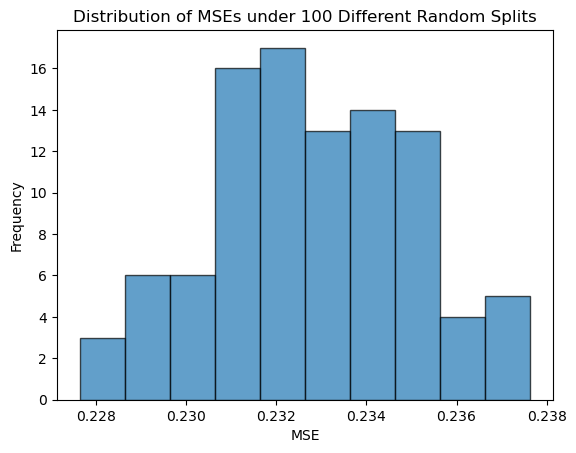

Mean MSE: 0.2330
Std MSE: 0.0023


In [16]:
# calculate MSE with "optimal" parameters and different random splits of the data

random_states = np.random.choice(range(1, 10000), size=100, replace=False)

MSEs = []
                                 
for rs in tqdm(random_states):
                                 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

    MSEs.append( run_bagging_regressor(X_train,y_train,
                                       n_estimators=140,
                                       max_samples=1.0,
                                       max_features=6)
               )

# histogram of MSEs

bin_spacing = np.arange(min(MSEs),max(MSEs),0.001)

plt.title("Distribution of MSEs under 100 Different Random Splits")
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.hist(MSEs,edgecolor='black',bins=bin_spacing,alpha=0.7)
plt.show()

print(f"Mean MSE: {np.mean(MSEs):.4f}")
print(f"Std MSE: {np.std(MSEs):.4f}")

### [Disgression: Multiple Plots can Illustrate the Relationships between Parameters]
If we do multiple plots, we can show the effect of one parameter on another in a very useful way!

**Remember: One of your goals is to UNDERSTAND your data, and seeing plots together is an excellent way to understand what is going on.**

max_features=8: 100%|██████████| 21/21 [01:09<00:00,  3.32s/it]


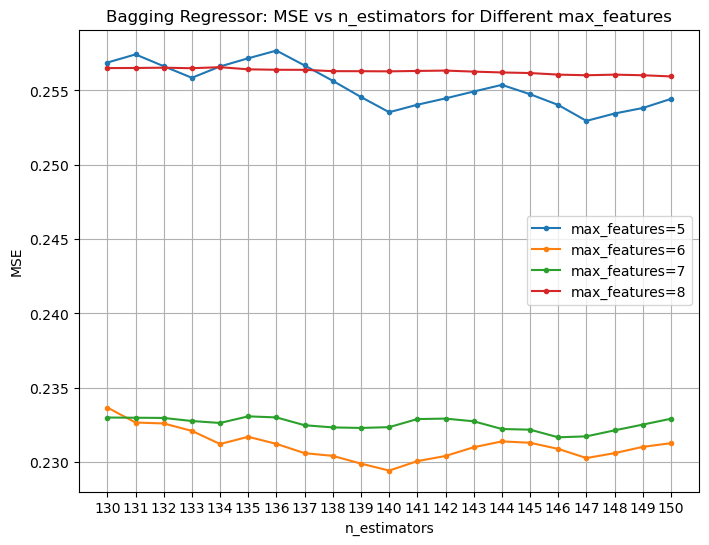

In [17]:
# Multiple plot of n_estimators vs MSE for various values for max_features


# Parameter values for n_estimators and max_features
parameter_list = range(130, 151)  # Range of n_estimators
max_features_list = range(5,9)  # Values for max_features

# Initialize the plot
plt.figure(figsize=(8, 6))
plt.title("Bagging Regressor: MSE vs n_estimators for Different max_features")
plt.xlabel("n_estimators")
plt.ylabel("MSE")
plt.xticks(parameter_list)
plt.grid()

# Loop through each value of max_features
for mf in max_features_list:
    MSEs = []  # Store MSEs for each n_estimators
    
    # Run for each n_estimators value
    for n in tqdm(parameter_list, desc=f"max_features={mf}"):
        MSEs.append(run_bagging_regressor(
            X_train,y_train,
            n_estimators=n,
            max_features=mf,
            max_samples = 1.0
        ))
    
    # Plot results for this max_features value
    plt.plot(parameter_list, MSEs, marker='.', label=f"max_features={mf}")

# Add legend to distinguish lines for each max_features
plt.legend()
plt.show()

### [End of Digression]
### Exploration and Tuning of Parameters using Grid Search and Random Search

**Is there a better way than "rolling your own" tuning code with `for` loops?**

Ideally, after exploring the data and basic parameter relationships with "hand tuning," in the end it would be useful to have a systematic method for searching the space of all parameter values, something like gradient search for hyperparameters.

In general, I like to see visual displays to understand the data and the search space, using the code such as I have demonstrated above, and then use use grid search to confirm and refine my results. It is fairly inefficient, so don't use it to explore large numbers of possibilities. You can run grid search multiple times with narrower and narrower parameter ranges, similar to what we did above explicitly with for loops.

`GridSearchCV` will allow you to specify a list of parameter values, and it will test every combination. It will use cross-validation and give you a list of the best parameter settings. If it takes too long, you can reduce the number of folds in CV or, at the loss of some accuracy, try using `RandomizedSearchCV`, which is included in the code but commented out.

In [18]:
# Run GridSearchCV

# Record start time
start = time.time()

# Define the model
bagging_model = BaggingRegressor(random_state=random_state)

# Define the parameter grid
param_dist = {
    'n_estimators': range(138,143),                 # Note that I have used relatively few options
    'max_samples' : np.linspace(0.99,1.0,11),
    'max_features': [6]
}

# Use GridSearchCV to find the best parameters

search = GridSearchCV(
    estimator=bagging_model,
    param_grid=param_dist,
    scoring='neg_mean_squared_error',  # MSE but negated for maximization by GridSearchCV
    cv=5,  # Number of folds for cross-validation -- Reduce this if efficiency is an issue
    n_jobs=-1,  # Use all available cores
    return_train_score=True
)

# Or RandomizedSearchCV -- not as accurate but faster

# search = RandomizedSearchCV(
#     estimator=bagging_model,
#     param_distributions=param_dist,
#     n_iter=20,  # Number of random combinations to test
#     scoring='neg_mean_squared_error',  # MSE but negated for maximization by RandomizedSearchCV
#     cv=5,  # Number of folds for cross-validation
#     n_jobs=-1,  # Use all available cores
#     random_state=random_state
# )

# Fit the GridSearchCV
search.fit(X_train, y_train)  

# Extract results into a DataFrame
results = pd.DataFrame(search.cv_results_)

# Select relevant columns for readability
results = results[[
    'param_n_estimators',
    'param_max_samples',
    'param_max_features',
    'mean_test_score',
    'std_test_score',
    'mean_train_score',  # Include training score
    'std_train_score',   # Include standard deviation of training score
    'rank_test_score'
]]

# Convert negative MSE to positive
results['mean_test_score'] = -results['mean_test_score']
results['mean_train_score'] = -results['mean_train_score']

# Sort by rank (best scores first)
results = results.sort_values(by='rank_test_score')

# Rename columns for printing only
renamed_results = results.rename(
    columns={
        'param_n_estimators': 'n_estimators',
        'param_max_samples': 'max_samples',
        'param_max_features': 'max_features',
        'mean_test_score': 'mean_cv_score',
        'std_test_score': 'std_cv_score',
        'mean_train_score': 'mean_train_score',
        'std_train_score': 'std_train_score'
    }
).drop(columns=['rank_test_score'])  # Drop the rank column for readability

# Print the results as a table
print("\nSearch Results (Top 5):\n")
print(renamed_results.head(5).to_string(index=False))  # Show the top 5 results with new headers

# Best parameters and test performance
print(f"\nBest Parameters: {search.best_params_}")
print(f"Best CV MSE: {-search.best_score_:.4f}")

# Evaluate on the test set
y_pred_bagging = search.best_estimator_.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_bagging)

print(f"Test MSE:    {test_mse:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))


Search Results (Top 5):

 n_estimators  max_samples  max_features  mean_cv_score  std_cv_score  mean_train_score  std_train_score
          140        0.997             6       0.228761      0.006906          0.032750         0.000275
          140        0.996             6       0.228893      0.006898          0.032846         0.000311
          140        0.998             6       0.228952      0.006916          0.032694         0.000291
          140        0.999             6       0.229002      0.007101          0.032587         0.000281
          140        0.995             6       0.229036      0.007099          0.032963         0.000322

Best Parameters: {'max_features': 6, 'max_samples': 0.997, 'n_estimators': 140}
Best CV MSE: 0.2288
Test MSE:    0.2324
Execution Time: 2m 29.86s


### Your Turn!

Rerun the previous cell after commenting-out `GridSearchCV` and commenting-in `RandomSearchCV`. 
Compare the accuracy of the results compared with the exhausive grid search, and also the amount of time it takes!    (Another tradeoff!)

### Completely Optional but Worth Considering

We did not manipulate any of the parameters of `DecisionTreeRegressor` in any of our tuning, and so the trees are able to grow to any depth.  In particular, you might try `friedman_mse` over `square_error` and try limiting the depth of the trees. 

## **Appendix**

### **Best Practices for `BaggingRegressor`**

The following is a list of the most useful parameters and guidance about how to adjust them. For a full list of parameters, see the `sklearn` documentation. 

Note that for some parameters (e.g., 'max_features') you can use an int or a float, the latter representing the percentage of the number of choice. Except for very simple datasets, it is usual to use floats, for example, `max_samples = 0.66` would train each estimator on approximately 2/3s of the data points. 

---

- **`estimator`** (default=`DecisionTreeRegressor`)  
  The base estimator used to fit on random subsets of the dataset.  
  - **Best Practices**:  
    - Use tree-based models (e.g., `DecisionTreeRegressor`) for capturing non-linear and complex patterns without feature transformations.  
    - For linear relationships, try linear models (e.g., `LinearRegression`, `Ridge`), with Bagging stabilizing performance in noisy data.  
    - Use `SVR` for datasets with mixed linear and non-linear relationships, particularly in high-dimensional data, as Bagging can help reduce overfitting risks.

---

- **`n_estimators`** (int), default=10  
  The number of base estimators in the ensemble.  
  - **Best Practices**:  
    - Start with the default and increase as long as you see improvement.
    - Evaluate diminishing returns by plotting the error as a function of `n_estimators`.

---

- **`max_depth`** {None, int}, default=None 
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain fewer than `min_samples_split` samples.  
  - **Best Practices:**
      - Set a reasonable value for `max_depth` (e.g., 10-20) to prevent overfitting, especially on small datasets.
      - Use **grid search** or **cross-validation** to identify the optimal depth for your dataset.
      - If you expect simple relationships in your data, consider a shallower tree for better generalization.

---

- **`max_samples`** (int or float), default=1.0  
  The number of samples to draw from the training data to train each base estimator. Samples are drawn with replacement by default.  
  - **Best Practices**:  
    - The default (`1.0`, i.e., 100%) works well for many datasets.  
    - For large datasets or when overfitting occurs, experiment with lower values (e.g., 0.66) to introduce more randomness.

---

- **`max_features`** (int, float, or None), default=1.0  
  The number of features to draw from the dataset to train each base estimator. Features are drawn without replacement by default.  
  - **Best Practices**:  
    - For high-dimensional datasets, reduce `max_features` (e.g., 0.5) to speed up training and introduce diversity across models.  
    - The default (1.0) works well for smaller datasets or when feature diversity is not a concern.

---

- **`n_jobs`** (int), default=1 
  The number of jobs (CPU cores) to run in parallel for both training and prediction. If `n_jobs=-1`, all available CPU cores will be used.  
  - **Best Practices**:  
    - Set `n_jobs=-1` to maximize parallel processing and speed up training, especially for large datasets or when using a high number of estimators (`n_estimators`).  
    - For shared or resource-limited environments, specify a smaller number (e.g., `n_jobs=2`) to avoid overloading the system.  
    - Use the default (1) for small datasets or when parallelization is not a concern.  
  - **Note**: Be cautious of memory usage when parallelizing on very large datasets, as each job holds a copy of the data in memory.
  

---



## 7.2 Lesson: Ensemble Methods: Random Forests
Random Forests build on the principles of Bagging by adding an extra layer of randomness to the process. In standard Bagging, each decision tree is trained on a different bootstrap sample of the data, but when splitting nodes, the algorithm searches over all available features $x_i$ to find the best split. 

This can lead to overemphasis on certain strong features, causing many trees in the ensemble to look quite similar.

To address this, Random Forests introduces a new kind of randomization `feature sampling`. Instead of considering all features when deciding how to split at each node, Random Forests randomly select a subset of $m$ features (where $m < p$, with $p$ being the total number of features). The algorithm then searches for the best split only within that subset. This forces each tree to explore different features and combinations, creating more diverse trees within the forest.

By adding this extra layer of randomness, Random Forests encourage the trees to "move around" more, reducing the likelihood of overfitting to specific patterns in the data. This also ensures that even if some features are particularly strong predictors, they won't dominate ever tree, allowing other relevant features to emerge, despite this randomization, important variables still "shine through" because they are consistently selected across multiple tress, strengthening their overall influence on the final model. 

The result is an ensemble of diverse trees that, when combined, produce a robust, accurate, and stable prediction. This method effectively captures complex interactions in the data while reducing variance, making random forests a powerful tool for both regresssion and classification tasks.

### Random Forests
The notebook from this video below can be found in this GitHub repository. Access the notebook and follow along with the video. Pause the video if you need to while you complete the workbook.

### Week 7 Video Notebook: Ensemble Methods -- Random Forests
This notebook accompanies the Week 7 video on Random Forests. The intent is to provide a baseline of techniques for implementing Random Forests, showing examples on a real dataset and providing template code for developing your own projects.

In order to streamline the presentation for a short video, I will mostly show code for the majority of the notebook, and provide an Appendix at the end with discussion of the best practices for choosing parameters and tuning your model.

In [20]:
# useful imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV,LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# globals

random_state = 42

# utility code

def format_time(seconds):
    
    # Convert seconds to hours, minutes, and remaining seconds
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    remaining_seconds = seconds % 60
    
    # Return a formatted string    
    if hours == 0 and minutes == 0:
        return f"{seconds:.2f}s"
    elif hours == 0:
        return f"{minutes}m {remaining_seconds:.2f}s"

    return f"{hours}h {minutes}m {remaining_seconds:.2f}s"

# To avoid constant warnings about jobs: 
#        UserWarning: A worker stopped while some jobs were given to the executor. 
#        This can be caused by a too short worker timeout or by a memory leak.

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [21]:
# Load the California Housing Dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [23]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [24]:
# Wrapper function to simplify experiments with RF models

def run_random_forest_regressor(X_train, y_train, 
                                n_estimators = 100,       
                                max_depth = None,         
                                min_samples_split = 2,    
                                min_samples_leaf = 1,     
                                max_samples = None,       
                                max_leaf_nodes=None,
                                max_features = 1.0,       
                                bootstrap = True,         
                                random_state = random_state,
                                cv=5,
                                ccp_alpha=0.0,
                                n_jobs=-1
                               ):
    
    rf_model = RandomForestRegressor(
        n_estimators = n_estimators,
        max_depth = max_depth,
        max_samples = max_samples,
        min_samples_split = min_samples_split,
        min_samples_leaf = min_samples_leaf,
        max_features = max_features,
        max_leaf_nodes=max_leaf_nodes,
        bootstrap = bootstrap,
        n_jobs = n_jobs,              # use all possible cores
        random_state = random_state,
        ccp_alpha=ccp_alpha,
    )
    
    # Perform cross-validation
    neg_mse_scores = cross_val_score(
        rf_model, X_train, y_train, 
        scoring='neg_mean_squared_error',
        cv=cv,
        n_jobs=n_jobs
    )

    mean_cv_mse = -np.mean(neg_mse_scores)  # Convert to positive MSE
    return mean_cv_mse

In [25]:
run_random_forest_regressor(X_train, y_train, 
                                n_estimators = 100,       
                                max_depth = None,         
                                min_samples_split = 2,    
                                min_samples_leaf = 1,     
                                max_samples = None,       
                                max_leaf_nodes=None,
                                max_features = 1.0,             
                                ccp_alpha=0.0,
                               )

0.261151275993014

### Your Turn!
As usual, you should play around with this a bit before proceeding. It is worth trying various values of n_estimators and seeing that random forests typically do well with large numbers of estimators, so play around with this parameter: you should see the MSE decrease as you increase this parameter, and eventually decrease. Don't worry about the other parameters yet.

100%|██████████| 20/20 [03:57<00:00, 11.86s/it]


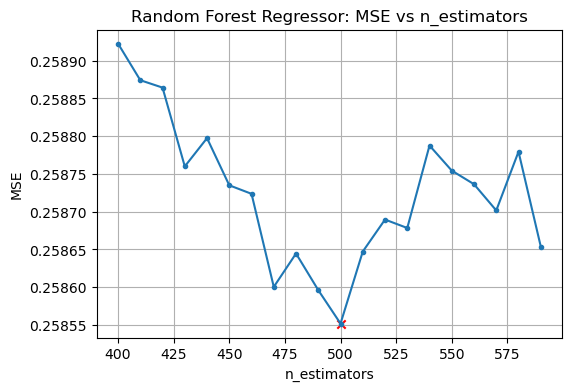

Minimum MSE 0.2586 found at x = 500
Execution Time: 3m 57.40s


In [26]:
# Plot a n_estimators vs MSE using a simple for loop

# record beginning time
start = time.time()

param = 'n_estimators'  

# parameter_list = range(400,1000,50) 
parameter_list = range(400,600,10)      

MSEs = []

for n in tqdm(parameter_list):

    MSEs.append( run_random_forest_regressor(X_train, y_train, 
                                n_estimators = n,       
                                max_depth = None,         
                                min_samples_split = 2,    
                                min_samples_leaf = 1,     
                                max_samples = None,       
                                max_leaf_nodes=None,
                                max_features = 1.0,             
                                ccp_alpha=0.0,
                               ) ) 


                            
# Find the minimum value
min_MSE = min(MSEs)

# Find the index of the minimum value
min_index = MSEs.index(min_MSE)

plt.figure(figsize=(6, 4))
plt.title("Random Forest Regressor: MSE vs "+param)
plt.plot(parameter_list, MSEs, marker='.')
plt.scatter([parameter_list[min_index]],[min_MSE],marker='x',color='red')
plt.xlabel(param)
plt.ylabel("MSE")
plt.grid()
plt.show()

if isinstance(parameter_list[min_index], int):
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]}")
else:
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))

100%|██████████| 17/17 [02:14<00:00,  7.93s/it]


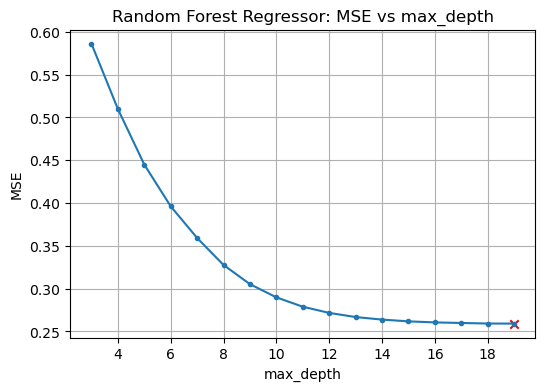

Minimum MSE 0.2591 found at x = 19
Execution Time: 2m 14.86s


In [27]:
# Plot a max_depth vs MSE using a simple for loop

# record beginning time
start = time.time()

param = 'max_depth'  

parameter_list = range(3,20)             # be sure to compare this with the default None

MSEs = []

for md in tqdm(parameter_list):

    MSEs.append( run_random_forest_regressor(X_train, y_train, 
                                n_estimators = 500,       
                                max_depth = md,         
                                min_samples_split = 2,    
                                min_samples_leaf = 1,     
                                max_samples = None,       
                                max_leaf_nodes=None,
                                max_features = 1.0,             
                                ccp_alpha=0.0,
                               ) ) 
     

# Find the minimum value
min_MSE = min(MSEs)

# Find the index of the minimum value
min_index = MSEs.index(min_MSE)

plt.figure(figsize=(6, 4))
plt.title("Random Forest Regressor: MSE vs "+param)
plt.plot(parameter_list, MSEs, marker='.')
plt.scatter([parameter_list[min_index]],[min_MSE],marker='x',color='red')
plt.xlabel(param)
plt.ylabel("MSE")
plt.grid()
plt.show()

if isinstance(parameter_list[min_index], int):
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]}")
else:
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))

Hm... given the shape of the curve, the small improvement, and the best practices described below, I'm going to stick with None (unlimited). We can check back later on this....

100%|██████████| 13/13 [02:21<00:00, 10.90s/it]


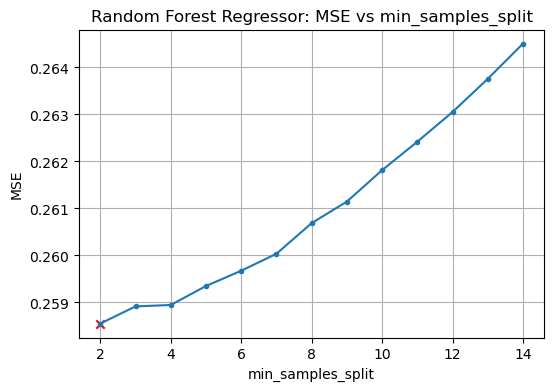

Minimum MSE 0.2586 found at x = 2
Execution Time: 2m 21.84s


In [28]:
# Plot a min_samples_split vs MSE using a simple for loop

# record beginning time
start = time.time()

param = 'min_samples_split'  

parameter_list = range(2,15)
# parameter_list = range(9,15)

MSEs = []

for mss in tqdm(parameter_list):

    MSEs.append( run_random_forest_regressor(X_train, y_train, 
                                n_estimators = 500,       
                                max_depth = None,         
                                min_samples_split = mss,    
                                min_samples_leaf = 1,     
                                max_samples = None,       
                                max_leaf_nodes=None,
                                max_features = 1.0,             
                                ccp_alpha=0.0,
                               ) ) 
    

# Find the minimum value
min_MSE = min(MSEs)

# Find the index of the minimum value
min_index = MSEs.index(min_MSE)

plt.figure(figsize=(6, 4))
plt.title("Random Forest Regressor: MSE vs "+param)
plt.plot(parameter_list, MSEs, marker='.')
plt.scatter([parameter_list[min_index]],[min_MSE],marker='x',color='red')
plt.xlabel(param)
plt.ylabel("MSE")
plt.grid()
plt.show()

if isinstance(parameter_list[min_index], int):
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]}")
else:
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))

100%|██████████| 4/4 [00:42<00:00, 10.62s/it]


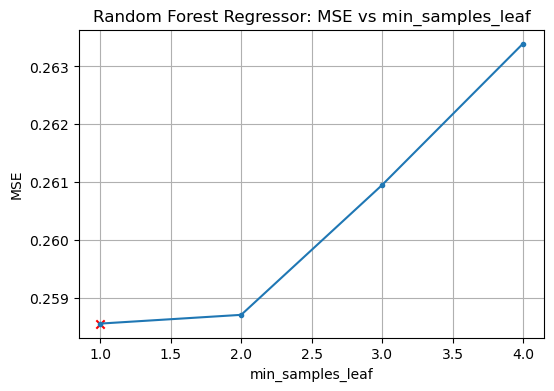

Minimum MSE 0.2586 found at x = 1
Execution Time: 42.66s


In [29]:
# Plot a min_samples_leaf vs MSE using a simple for loop

# record beginning time
start = time.time()

param = 'min_samples_leaf'  

parameter_list = range(1,5)      

MSEs = []

for msl in tqdm(parameter_list):

    MSEs.append( run_random_forest_regressor(X_train, y_train, 
                                n_estimators = 500,       
                                max_depth = None,         
                                min_samples_split = 2,    
                                min_samples_leaf = msl,     
                                max_samples = None,       
                                max_leaf_nodes=None,
                                max_features = 1.0,             
                                ccp_alpha=0.0,
                               ) )

     

# Find the minimum value
min_MSE = min(MSEs)

# Find the index of the minimum value
min_index = MSEs.index(min_MSE)

plt.figure(figsize=(6, 4))
plt.title("Random Forest Regressor: MSE vs "+param)
plt.plot(parameter_list, MSEs, marker='.')
plt.scatter([parameter_list[min_index]],[min_MSE],marker='x',color='red')
plt.xlabel(param)
plt.ylabel("MSE")
plt.grid()
plt.show()

if isinstance(parameter_list[min_index], int):
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]}")
else:
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))

100%|██████████| 11/11 [01:34<00:00,  8.59s/it]


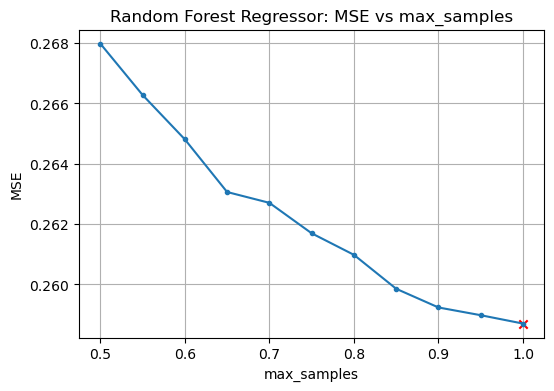

Minimum MSE 0.2587 found at x = 1.0000
Execution Time: 1m 34.57s


In [31]:
# Plot a max_samples vs MSE using a simple for loop

# record beginning time
start = time.time()

param = 'max_samples'  

parameter_list = np.linspace(0.5,1.0,11)  




MSEs = []

for ms in tqdm(parameter_list):

    MSEs.append( run_random_forest_regressor(X_train, y_train, 
                                n_estimators = 500,       
                                max_depth = None,         
                                min_samples_split = 2,    
                                min_samples_leaf = 2,     
                                max_samples = ms,       
                                max_leaf_nodes=None,
                                max_features = 1.0,             
                                ccp_alpha=0.0,
                               ) ) 
     

# Find the minimum value
min_MSE = min(MSEs)

# Find the index of the minimum value
min_index = MSEs.index(min_MSE)

plt.figure(figsize=(6, 4))
plt.title("Random Forest Regressor: MSE vs "+param)
plt.plot(parameter_list, MSEs, marker='.')
plt.scatter([parameter_list[min_index]],[min_MSE],marker='x',color='red')
plt.xlabel(param)
plt.ylabel("MSE")
plt.grid()
plt.show()

if isinstance(parameter_list[min_index], int):
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]}")
else:
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))

100%|██████████| 31/31 [04:33<00:00,  8.81s/it]


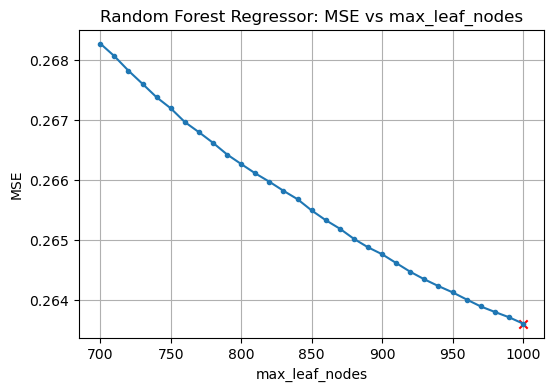

Minimum MSE 0.2636 found at x = 1000
Execution Time: 4m 33.30s


In [32]:
# Plot a max_leaf_nodes vs MSE using a simple for loop

# record beginning time
start = time.time()

param = 'max_leaf_nodes'  

parameter_list = range(700,1001,10)     

MSEs = []

for mls in tqdm(parameter_list):

    MSEs.append( run_random_forest_regressor(X_train, y_train, 
                                n_estimators = 500,       
                                max_depth = None,         
                                min_samples_split = 2,    
                                min_samples_leaf = 2,     
                                max_samples = 1.0,       
                                max_leaf_nodes=mls,
                                max_features = 1.0,             
                                ccp_alpha=0.0,
                               ) ) 
     

# Find the minimum value
min_MSE = min(MSEs)

# Find the index of the minimum value
min_index = MSEs.index(min_MSE)

plt.figure(figsize=(6, 4))
plt.title("Random Forest Regressor: MSE vs "+param)
plt.plot(parameter_list, MSEs, marker='.')
plt.scatter([parameter_list[min_index]],[min_MSE],marker='x',color='red')
plt.xlabel(param)
plt.ylabel("MSE")
plt.grid()
plt.show()

if isinstance(parameter_list[min_index], int):
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]}")
else:
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))

100%|██████████| 8/8 [00:51<00:00,  6.48s/it]


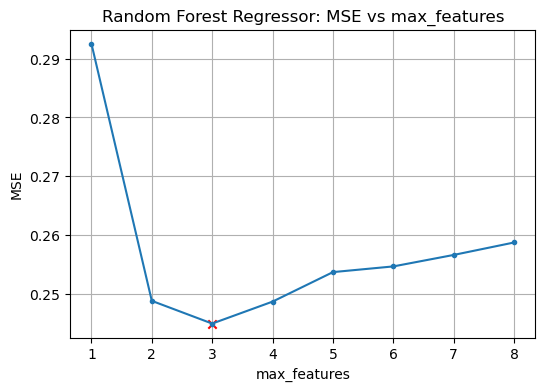

Minimum MSE 0.2449 found at x = 3
Execution Time: 51.89s


In [30]:
# Plot a max_features vs MSE using a simple for loop

# record beginning time
start = time.time()

param = 'max_features'  

parameter_list = range(1,9)


MSEs = []

for mf in tqdm(parameter_list):

    MSEs.append( run_random_forest_regressor(X_train, y_train, 
                                n_estimators = 500,       
                                max_depth = None,         
                                min_samples_split = 2,    
                                min_samples_leaf = 2,     
                                max_samples = 1.0,       
                                max_leaf_nodes=None,
                                max_features = mf,             
                                ccp_alpha=0.0,
                               ) ) 
     

# Find the minimum value
min_MSE = min(MSEs)

# Find the index of the minimum value
min_index = MSEs.index(min_MSE)

plt.figure(figsize=(6, 4))
plt.title("Random Forest Regressor: MSE vs "+param)
plt.plot(parameter_list, MSEs, marker='.')
plt.scatter([parameter_list[min_index]],[min_MSE],marker='x',color='red')
plt.xlabel(param)
plt.ylabel("MSE")
plt.grid()
plt.show()

if isinstance(parameter_list[min_index], int):
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]}")
else:
    print(f"Minimum MSE {min_MSE:.4f} found at x = {parameter_list[min_index]:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))

Ok, let's summarize after one round:
- The three parameters max_depth, max_leaf_nodes, and max_samples are unlikely to change; this is to be expected with random forests because they inherently rely on randomness in feature selection and tree structure, and these parameters primarily control the individual trees rather than the overall ensemble behavior.
- Therefore, in the second round, we can simply concentrate on the other parameters.
- After one more round, I found the following "optimal" parameters shown in the next code cell.

In [33]:
run_random_forest_regressor(X_train, y_train, 
                                n_estimators = 971,       
                                max_depth = None,         
                                min_samples_split = 2,    
                                min_samples_leaf = 1,     
                                max_samples = 1.0,       
                                max_leaf_nodes=None,
                                max_features = 3,             
                                ccp_alpha=0.0,            
                               )

0.24145879992303376

In [34]:
rf_model = RandomForestRegressor(
    n_estimators = 971,
    max_depth = None,
    max_samples = 1.0,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_features = 3,
    max_leaf_nodes=None
)

   
rf_model.fit(X_train,y_train)

y_test_pred = rf_model.predict(X_test)

test_MSE = mean_squared_error(y_test_pred,y_test)

print(f"Test MSE: {test_MSE:.4f}")

Test MSE: 0.2385


### Your Turn!
To refine or confirm the parameter settings, expand the list of parameter values below and check a bit around the values of the three parameters shown, which are the only ones to move around a bit during the two rounds of testing above.

### Grid Search
On to grid search to confirm! It seems pretty clear that the only features to refine are `n_estimators` and `max_features`. Just to be sure, let's also check on `min_samples_leaf`; my intuition (and the shape of the curve) is that the default is probably better here, but let's check to be sure.

In [35]:
# Run GridSearchCV

# Record start time
start = time.time()

# Define the model
rf_model = RandomForestRegressor(random_state=random_state)

# Define the parameter grid
param_dist = {
    'n_estimators':     [971],
    'min_samples_leaf': [1],
    'max_features':     [3]
}

# Use GridSearchCV to find the best parameters
search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_dist,
    scoring='neg_mean_squared_error',  # MSE but negated for maximization by GridSearchCV
    cv=5,  # Number of folds for cross-validation -- Reduce this if efficiency is an issue
    n_jobs=-1,  # Use all available cores
    return_train_score=True
)

# Fit the GridSearchCV
search.fit(X_train, y_train)  

# Extract results into a DataFrame
results = pd.DataFrame(search.cv_results_)

# Select relevant columns for readability
results = results[[
    'param_n_estimators',
    'param_min_samples_leaf',
    'param_max_features',
    'mean_test_score',
    'std_test_score',
    'mean_train_score',  # Include training score
    'std_train_score',   # Include standard deviation of training score
    'rank_test_score'
]]

# Convert negative MSE to positive
results['mean_test_score'] = -results['mean_test_score']
results['mean_train_score'] = -results['mean_train_score']

# Sort by rank (best scores first)
results = results.sort_values(by='rank_test_score')

# Rename columns for printing only
renamed_results = results.rename(
    columns={
        'param_n_estimators': 'n_estimators',
        'param_min_samples_leaf': 'min_samples_leaf',
        'param_max_features': 'max_samples',
        'mean_test_score': 'mean_cv_score',
        'std_test_score': 'std_cv_score',
        'mean_train_score': 'mean_train_score',
        'std_train_score': 'std_train_score'
    }
).drop(columns=['rank_test_score'])  # Drop the rank column for readability

# Print the results as a table
print("\nSearch Results (Top 5):\n")
print(renamed_results.head(5).to_string(index=False))  # Show the top 5 results with new headers

# Best parameters and test performance
print(f"\nBest Parameters: {search.best_params_}")
print(f"Best CV MSE: {-search.best_score_:.4f}")

# Evaluate on the test set
y_pred_rf = search.best_estimator_.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_rf)

print(f"Test MSE:    {test_mse:.4f}")

# Record end time and execution time
end = time.time()
print(f"Execution Time: " + format_time(end-start))


Search Results (Top 5):

 n_estimators  min_samples_leaf  max_samples  mean_cv_score  std_cv_score  mean_train_score  std_train_score
          971                 1            3       0.241459        0.0039          0.032824         0.000202

Best Parameters: {'max_features': 3, 'min_samples_leaf': 1, 'n_estimators': 971}
Best CV MSE: 0.2415
Test MSE:    0.2390
Execution Time: 50.33s


## Appendix 

### **Most Significant Parameters and Best Practices for `RandomForestRegressor`**

---

- **`n_estimators`** (int), default=100  
  The number of trees in the forest.  
  - **Best Practices**:  
    - Start with the default (`100`) and increase incrementally for larger datasets or to stabilize predictions.  
    - Be mindful of diminishing returns as `n_estimators` increases, which may not justify additional computational cost.

---

- **`criterion`** ({"squared_error", "friedman_mse", "absolute_error"}), default="squared_error"  
  Controls how the decision tree measures the quality of splits during its construction.  
    - **“squared_error”**: Minimizes the L2 loss using the mean of each terminal node.  
    - **“friedman_mse”**: A refinement of squared error, often slightly better for regression tasks.  
    - **“absolute_error”**: Minimizes the L1 loss using the median of each terminal node but is computationally expensive.  
  - **Best Practices**:  
    - Use the default (`squared_error`) for most tasks.  
    - Consider `friedman_mse` for slight performance improvements in regression.  
    - Avoid `absolute_error` unless L1 loss is explicitly required.

---

- **`max_depth`** (int or None), default=None  
  The maximum depth of the trees. If None, nodes are expanded until all leaves are pure or contain fewer than `min_samples_split` samples.  
  - **Best Practices**: 
  
       - Start with None (unlimited depth) for initial exploration, as random forests mitigate overfitting due to their ensemble averaging.
        
       - Reduce to a fixed value (e.g., 10–20) if computational efficiency is a concern or if overfitting persists despite the ensemble nature of the model.
        
       - Experiment with smaller values (e.g., 5–15) for noisy or small datasets, where deep trees may capture noise rather than true patterns.

---

- **`min_samples_split`** (int or float), default=2  
  The minimum number of samples required to split an internal node.  
  - **Best Practices**:  
    - Use the default (`2`) for most tasks.  
    - Increase this value (e.g., `5–10`) for larger datasets or to prevent overly deep trees and overfitting.

---

- **`min_samples_leaf`** (int or float), default=1  
  The minimum number of samples required to be at a leaf node. A split at any depth will only be considered if it leaves at least `min_samples_leaf` training samples in each of the left and right branches.  
  - **Best Practices**:  
    - Start with the default (`1`) and increase if overfitting occurs. Larger values (e.g., `5–10`) smooth predictions and reduce variance.  
    - For larger datasets, consider using a fraction (e.g., `0.01`) to adapt the value to dataset size.

---

- **`max_samples`** (int or float), default=None  
  If bootstrap is True (the default), the number of samples to draw from X to train each base estimator. Samples are drawn with replacement by default in random forests.  
  
  
  - **Best Practices:**  
      - If None (default), each tree is trained on a bootstrap sample of the entire dataset. This works well in most cases.  
      - For large datasets or to introduce more randomness, consider using a fraction of the dataset (e.g., `0.8` or `0.66`) to train each tree.  
      - Reducing `max_samples` can help improve computational efficiency when training on very large datasets.

    
---

- **`max_features`** ({"sqrt", "log2", int, float, None}), default=1.0  
  The number of features to consider when looking for the best split:  
    - **“sqrt”**: Square root of the total number of features (default).  
    - **“log2”**: Log base 2 of the total number of features.  
    - **None**: Use all features.  
  - **Best Practices**:  
    - Use `"sqrt"` for most regression tasks to balance randomness and accuracy.  
    - Smaller values (e.g., `"log2"`) reduce overfitting and improve diversity among trees.  
    - Larger values (e.g., `None`) may improve accuracy but risk overfitting.

---

- **`max_leaf_nodes`** (int), default=None  
  Grow trees with a maximum number of leaf nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None, the number of leaf nodes is unlimited.  
  - **Best Practices**:  
    - Leave as `None` initially and adjust only if overfitting is observed.  
    - Use smaller values (e.g., `50–500`) for better generalization, especially on noisy datasets.

---


- **`ccp_alpha`** {float}, default=0.0.  Complexity parameter used for Minimal Cost-Complexity Pruning. The larger the `ccp_alpha`, the more aggressive the pruning.

  - **Best Practices:**
      - Random forests typically use fully grown trees by default, so `ccp_alpha` is less commonly used in this context.
      - If you observe overfitting in your random forest model, consider applying pruning with `ccp_alpha` to individual trees as an advanced technique.
      - Use **`GridSearchCV`** or **cross-validation** to find the optimal value of `ccp_alpha` for your dataset.
      - Start with small values (e.g., 0.001 or 0.01) and gradually increase to balance tree complexity and performance.
      - Be aware that pruning individual trees may slightly reduce the strength of the ensemble but can help in datasets prone to noise or overfitting.


### Think About It
- Why does adding randomness to the feature selection process help Random Forests reduce overfitting compared to standard Bagging?
- How might Random Forests handle a dataset where certain features are highly correlated? Would this affect the feature sampling process?
- Can you think of a scenario where Random Forests might not perform well? What characteristics of the data could lead to this, and how might you address it?
- How do Random Forests compare to a single decision tree in terms of interpretability? Why might this be a drawback in some applications?
- Why do important features still tend to "shine through" in Random Forests, even though individual trees may use different subsets of features?

## 7.3 Lesson: Boosting Trees
Imagine you’re trying to predict customer churn for a subscription service. You build a decision tree to classify whether a customer will leave or stay based on their usage patterns. The model works, but it's not perfect—it captures some patterns but misses out on others. What if you could improve it by continuously correcting the errors your model makes, creating a series of models that gradually gets better? This is the principle behind Boosting, an ensemble method that refines predictions step by step.

### What is Boosting?
Boosting is an ensemble method that differs fundamentally from approaches like Random Forests. While Random Forests build multiple independent trees in parallel, Boosting builds trees sequentially. Each new tree learns from the mistakes of the previous trees, gradually correcting errors to improve the overall fit.

### How Does it Work?
- The model starts by fitting a tree to the data.
- The fit is intentionally weakened or "crushed" using a parameter $\lambda$ which ensures that the tree doesn't fully capture all details.
- The algorithm then identifies the parts of the target variable that the initial tree did not capture well and fits a new tree to those "residuals" - the error left over.
- This process is repeated iteratively. With each iteration, a new tree is fit to the residuals, and then the predictions are updated by adding the new tree's contribution, again adjusted by $\lambda$.

Mathematically, the model can be expressed as follows:
1. Initialize $\hat{f}(x) = 0$, and set residuals $r_i = y_i$ for all $i$.
2. For each iteration $b = 1, 2, \dots, B$:
    1. Fit a tree $\widehat{f}_b$ with $d$ splits to the residuals.
    2. Update the model: $\hat{f}(x) \leftarrow \hat{f}(x) + \lambda \hat{f}_b(x)$.
    3. Update the residuals: $r_i \leftarrow r_i - \lambda \hat{f}_b(x).$
3. Output the final model: $\hat{f}(x) = \sum^{B}_{b=1} \lambda \hat{f}_b(x)$.

In the context of predicting customer churn, the first tree might capture obvious patterns (like users who haven’t logged in recently), but subsequent trees would pick up subtler patterns (like users who still log in but have reduced their activity significantly). Each tree focuses on correcting the mistakes of the previous ones, leading to a more nuanced final model.

The following diagram shows how this might work using sklearn’s AdaBoost algorithm. It shows multiple rounds of training, starting with a dataset $T_0$ where all records have equal weight. After training the first model $h_0$, misclassified records are given more weight in the next dataset $T_1$, which is used to train the next model $h_1$. This process continues, with each susequent model focusing on the errors of the previous ones. The final prediction combines the outputs of all models, weighed by coefficients $a_0, a_1, a_2, \dots,$ The AdaBoost equation is shown to represent the final suggested prediction.

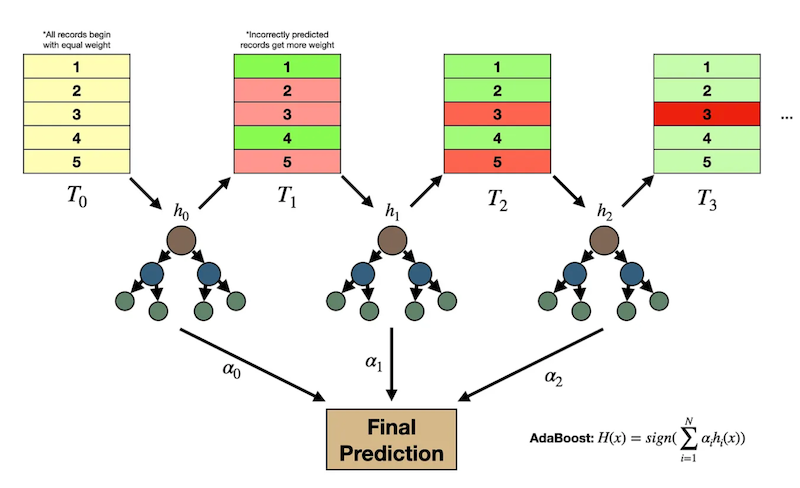

### Why Does Boosting Work?
The key to Boosting’s effectiveness lies in the way it learns from its mistakes. Each tree focuses on what the previous ones missed, refining the prediction step by step. Because each tree is only making small adjustments (thanks to the "crush" factor ﻿lambda﻿), the method prevents overfitting, even as more trees are added.

**Boosting Reduces Bias AND Variance:** Unlike Bagging, which primarily reduces variance, Boosting can address both bias (by making the model more flexible) and variance (by using weak learners that prevent overfitting).

### Choosing Parameters in Boosting
For Boosting to be effective, careful tuning of its parameters is required:

- **$\lambda$ (Shrinkage Factor):** Determines how much each new tree can change the existing model. A smaller ﻿lambda﻿ forces each tree to make only slight adjustments, helping to avoid overfitting. Typical values are around 0.1 to 0.3.
- **$B$ (Number of Trees):** More trees lead to a more refined model, but computational cost increases. Often, hundreds or thousands of trees are used.
- **$d$ (Tree Depth):** Unlike Bagging, Boosting typically uses shallow trees. Each tree is a "weak learner," meaning it captures only basic patterns. This also helps in preventing overfitting.

As with Bagging and Random Forests, these hyperparameters are usually chosen using grid search in combination with cross-validation.

Conclusion
Boosting builds models that are more accurate and robust than a single decision tree by iteratively refining predictions and focusing on the mistakes from previous iterations. With careful tuning, Boosting can adapt to complex datasets, providing precise predictions where other methods might fail. 
